# OpenCV
> OpenCV (Open Source Computer Vision Library: http://opencv.org) is an open-source library that includes several hundreds of computer vision algorithms.

> OpenCV has a modular structure, which means that the package includes several shared or static libraries. The following modules are available:

* Core functionality (core) - a compact module defining basic data structures, including the dense multi-dimensional array Mat and basic functions used by all other modules.
* **Image Processing (imgproc)** - an image processing module that includes linear and non-linear image filtering, geometrical image transformations (resize, affine and perspective warping, generic table-based remapping), color space conversion, histograms, and so on.
* Video Analysis (video) - a video analysis module that includes motion estimation, background subtraction, and object tracking algorithms.
* Camera Calibration and 3D Reconstruction (calib3d) - basic multiple-view geometry algorithms, single and stereo camera calibration, object pose estimation, stereo correspondence algorithms, and elements of 3D reconstruction.
* 2D Features Framework (features2d) - salient feature detectors, descriptors, and descriptor matchers.
* Object Detection (objdetect) - detection of objects and instances of the predefined classes (for example, faces, eyes, mugs, people, cars, and so on).
* High-level GUI (highgui) - an easy-to-use interface to simple UI capabilities.
* Video I/O (videoio) - an easy-to-use interface to video capturing and video codecs.
* ... some other helper modules, such as FLANN and Google test wrappers, Python bindings, and others.

> Notice：The origine of the coordinate is at the top left, so rows correspond to y and columns correspond to x.
## 1. Concept：

*  image formats：jpg、png、gif、psd、tiff、bmp...
*  reference：(http://zhuanlan.zhihu.com/p/143649897)
 
## 2. Basic operations of openCV

### Load images

use`cv2.imread()`to read a image：
- parameter1：image name
    - If the image is placed in the current folder, write the file name, such as' lena. jpg '
    - Otherwise, an absolute path is required, such as 'D:\OpenCVSamples\lena.jpg'

- parameter2：default value is adopted if omitted
    - `cv2.IMREAD_COLOR`：Color image, default is 1
    - `cv2.IMREAD_GRAYSCALE`：Gray image,default is 0
    - `cv2.IMREAD_UNCHANGED`：Color iamge with transparent channels, default is -1

> Experience: There should be no Chinese in the file path. There is no error reported if the load is not successful. The error will be reported only after later processing.
It is a small pit.

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

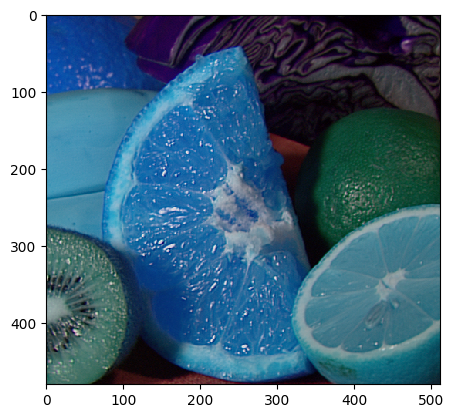

In [7]:
#load image
img=cv2.imread("data/fruits.jpg")
plt.imshow(img)

* Most people may know that the color images on the computer are displayed in RGB (Red Green Blue) color mode, but the color images in OpenCV are stored in B-G-R channel order by default.

* Note: If color images are loaded in BGR mode using OpenCV, it will not be displayed correctly by Matplotib.

* reference： [Matplotlib Plotting Styles and Features](https://matplotlib.org/2.0.2/api/pyplot_api.html)

(480, 512, 3)


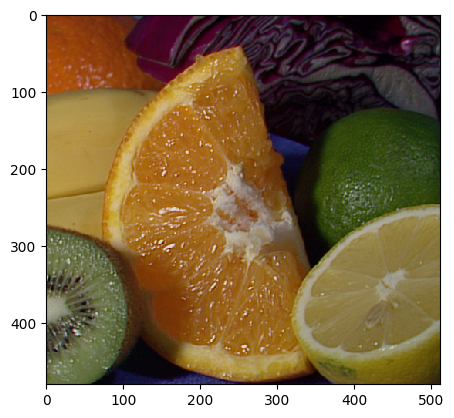

In [8]:
# Convert BGR to RGB 
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# display image
plt.imshow(img)
cv2.waitKey(0)
# close all of the windows
cv2.destroyAllWindows()
# save image
cv2.imwrite("fruits.bmp",img)
print(img.shape)

### Drawing function
* cv2.line()，cv2.rectangle()，cv2.circle()
parameters：
  * Img: the image you want to draw.
  * Color: the color of the shape.
  * Thickness: the thickness of the line. If a closed figure is set to - 1, the figure will be filled. The default value is 1
  * Linetype: Type of line
* cv2.putText()
parameters：
  * Img: the image you want to draw.
  * Parameter 2: Text to be added.
  * Parameter 3: the starting coordinate of the text (the lower left corner is the starting point)
  * Parameter 4: Font
  * Parameter 5: Text size (scaling)

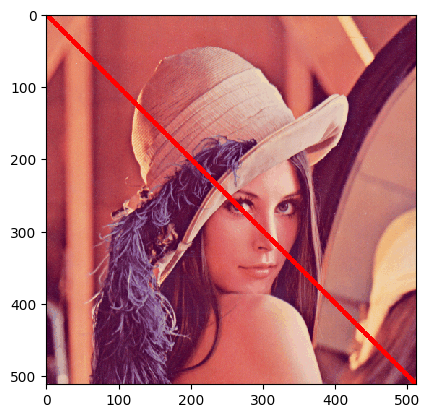

In [10]:
# Draw line
import numpy as np
import cv2
img=cv2.imread("data/lenna.jpg")
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
# Draw a diagonal red line with thickness of 5 px
cv2.line(img,(0,0),(511,511),(255,0,0),5)
plt.imshow(img)

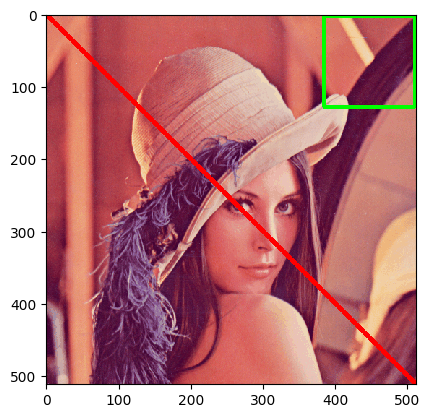

In [11]:
# Draw rectangle
# Draw a rectangle with coordinates of the top left corner and the bottom right corner
cv2.rectangle(img,(384,3),(510,128),(0,255,0),3)
plt.imshow(img)

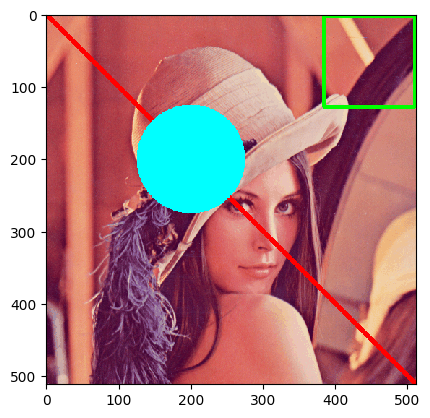

In [12]:
# Draw circle
# Draw a circle with the center point coordinates and the radius
cv2.circle(img,(200,200), 75, (0,255,255), -1)
plt.imshow(img)

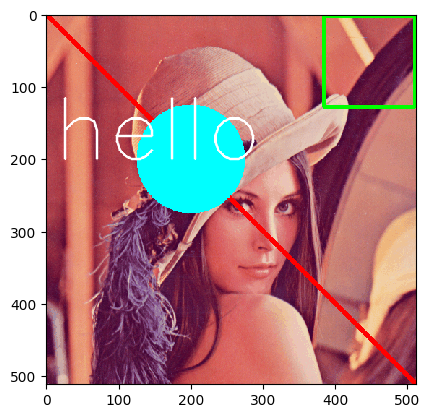

In [13]:
# putText
font = cv2.FONT_HERSHEY_SIMPLEX
# putText: hello
cv2.putText(img, 'hello', (10, 200), font, 4, (255, 255, 255), 2, lineType=cv2.LINE_AA)
plt.imshow(img)

### Image geometric transformation
1. resize
* ```cv2.resize(filename, methods) ```

five interpolation methods：

> * ```cv2.INTER_NEAREST ```Nearest neighbor interpolation
> * ```cv2.INTER_LINEAR ```linear interpolation
> * ```cv2.INTER_AREA``` local pixel resampling, regional interpolation
> * ```cv2.INTER_CUBIC``` Cubic interpolation based on 4x4 neighborhood
> * ```cv2.INTER_LANCZOS4 ```Lanczos Interpolation based on 8x8 neighborhood

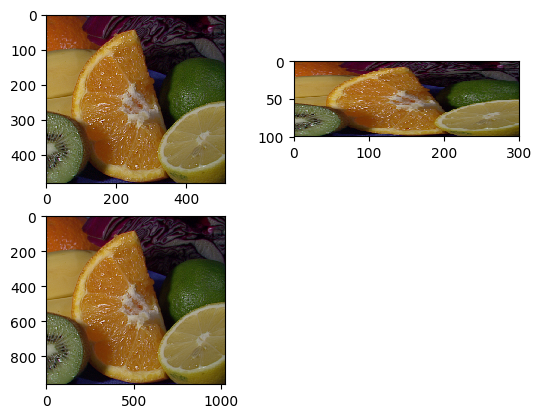

In [14]:
img = cv2.imread("data/fruits.jpg")
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.subplot(2,2,1)
plt.imshow(img)

# according to the designated width and height
res = cv2.resize(img, (300, 100))
# according to the scale, for example: 2 times in x and y direction
res2 = cv2.resize(img, None, fx=2, fy=2, interpolation=cv2.INTER_LINEAR)

plt.subplot(2,2,2)
plt.imshow(res)
plt.subplot(2,2,3)
plt.imshow(res2)

2. rotate image：
* ```cv2.flip(filename, flipcode) ```

> * ```filename ```:image name
> * ```flipcode ```：Flip mode——1: horizontal; 0: vertically; - 1: horizontally and vertically


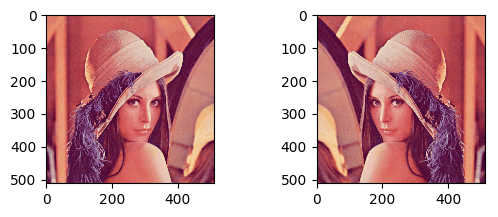

In [15]:
# 水平翻转 rotate image
img=cv2.imread("data/lenna.jpg")
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
#horizontal
img_flipped=cv2.flip(img,1)
plt.subplot(2,2,1)
plt.imshow(img)
plt.subplot(2,2,2)
plt.imshow(img_flipped)

3.translation 
* ```cv2.warpAffine(src, M, dsize) ```：
> * ```src ```:input image
> * ```M ```：transformation matrix
> * ```dsize ```：output image
> * interpolation methods

* To translate the picture, we need to define the following matrix, tx, ty is the distance of translation in the x and y directions: M=[1,0, tx; 0,1, ty]

512 512


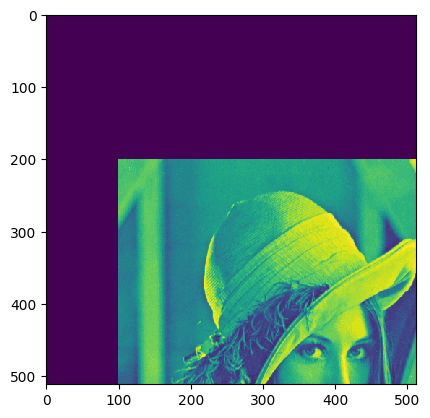

In [40]:
# translation 平移图片
# image translation 平移图片
import numpy as np
# get the image size: row and cols
rows, cols = img.shape[:2]  # 取前面两个channel
print(rows,cols)
# define translation matrix, numpy float32
# X-axis translation 100, y-axis translation 200
# The axes selected here are x is horizontal right and y is vertical down respectively
M = np.float32([[1, 0, 100], [0, 1, 200]])
# using warpAffine() to translate image
img_translation = cv2.warpAffine(img, M, (cols, rows))
plt.imshow(img_translation)

### **exercise1**
> **Try to translate image in horizontal and vertical.**


### ROI(Region of Interest)

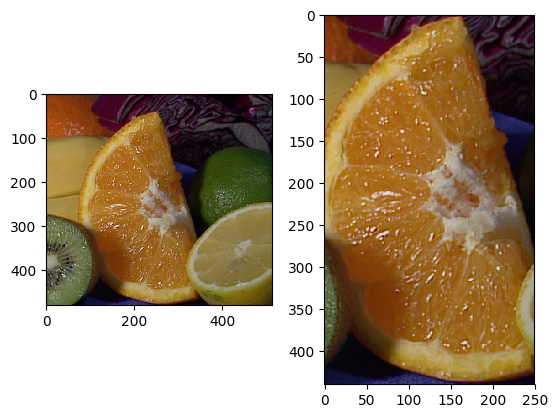

In [20]:
img = cv2.imread("data/fruits.jpg")
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.subplot(1,2,1)
plt.imshow(img)
# get ROI
orange = img[40:500,90:340]
plt.subplot(1,2,2)
plt.imshow(orange)

### Image channel splitting and merging(图像通道分割和合并)
* The three BGR channels of a color image can be displaied separately or combined into one image.
```cv2.split()```和```cv2.merge()```
* Image attributes: row, column, channel, image data type, number of pixels, etc
  * img.shape: a tuple with rows and columns。
  * img.size: pixel number
  * img.dtype: image data type

In [ ]:
# Image channel splitting and merging 图像通道的分割和合并
# read a image
img=cv2.imread("data/lenna.jpg")
print(img.shape,img.size, img.dtype)
# channel splitting
b, g, r = cv2.split(img)
# channel merging
img = cv2.merge((b, g, r))  #merge合并

In [ ]:
BGR_Image=cv2.merge([b,g,r])
RGB_Image = cv2.cvtColor(BGR_Image, cv2.COLOR_BGR2RGB)
# set up the figure size
plt.figure(figsize=(12,12))
# Display each channel
plt.subplot(1,4,1)
plt.imshow(RGB_Image)
plt.title('RGB_Image')
plt.subplot(1,4,2)
plt.imshow(r,cmap='gray')
plt.title('R_Channel')
plt.subplot(1,4,3)
plt.imshow(g,cmap='gray')
plt.title('G_Channel')
plt.subplot(1,4,4)
plt.imshow(b,cmap='gray')
plt.title('B_Channel')

### Color space conversion（颜色空间转化）

> * RGB or BGR to gray（COLOR_RGB2GRAY，COLOR_BGR2GRAY）
> * RGB or BGR to YcrCb（or YCC）（COLOR_RGB2YCrCb，COLOR_BGR2YCrCb）
> * RGB or BGR to HSV（COLOR_RGB2HSV，COLOR_BGR2HSV）
> * RGB or BGRto Luv（COLOR_RGB2Luv，COLOR_BGR2Luv）
> * gray to RGB or BGR（COLOR_GRAY2RGB，COLOR_GRAY2BGR）
> * TIPS：Color conversion is actually a mathematical operation，e.g.: RGB to gray：gray=R*0.299+G*0.587+B*0.114。

* reference：(https://zhuanlan.zhihu.com/p/112790325)：


In [ ]:
# Color space conversion颜色空间转换
img = cv2.imread("data/fruits.jpg")
# BGR to gray
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# save gray image
plt.imshow(img_gray,cmap="gray")
print(img_gray.shape)

### Object tracking based on its color

* HSV is a color model commonly used for color recognition. It is easier to distinguish colors than BGR,e.g.: COLOR_BGR2HSV
* reference：[RGB、HSV and HSL](https://zhuanlan.zhihu.com/p/67930839)

In [ ]:
# Object tracking based on its color 基于颜色对象的跟踪

# Let's implement an example of using HSV to display only blue objects in the image. 
# The steps are as follows:
# read image ->Convert BGR to HSV ->Extract objects in blue range ->Display blue objects

img=cv2.imread("data/cornfield.jpg")
# Set the blue color range, which is different under different lighting conditions, and can be adjusted flexibly
lower_blue=np.array([110,50,50])
upper_blue = np.array([130, 255, 255])
# Convert BGR to HSV
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
# inRange()：between lower/upper is white, and the other is black
mask = cv2.inRange(hsv, lower_blue, upper_blue)
## operation on the original image and mask
result = cv2.bitwise_and(img, img, mask=mask)

#Convert to RGB to display
img_rgb=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
mask_rgb=cv2.cvtColor(mask,cv2.COLOR_BGR2RGB)
res_rgb=cv2.cvtColor(result,cv2.COLOR_BGR2RGB)
images=[img_rgb,mask_rgb,res_rgb]

for i in range(3):
    plt.subplot(1,3,i+1)
    plt.imshow(images[i])

### **exercise2**
> **Try to extract multiple objects of different colors at the same time, such as red, blue and green objects.**

### Arithmetic operation

##### addition 
* ```cv2.add()```，The size (height/width/number of channels) of the two added images must be the same.
>* ```cv2.add(src1, src2, dst=None, mask=None, dtype=None)```——Add two images, if it is greater than 255,take 255. 

* ```res = img1 + img2``` , using "+" while the result is not the same as cv2.add();
>* ```img1 + img2``` ——Using matrix addition in numpy, the result of addition is %256

* ```cv2.addWeighted(src1, alpha, src2, beta, gamma)```——Two images with the same resolution and data type can be merged by setting transparency(Image fusion)
> * Alpha is the transparency of src1
> * Beta is the transparency of src2
> * gamma is the parameter adjusting brightness 
>     * $dist=\alpha×sarc1 +\beta×sarc2+\gamma $ 

In [ ]:
# Arithmetic operation算数运算
import cv2
import matplotlib.pyplot as plt
# read image
img1=cv2.imread("data/lenna.jpg")
img2=cv2.imread("data/fruits.jpg")
# color to gray
img1=cv2.cvtColor(img1,cv2.COLOR_BGR2GRAY)
img2=cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)
#resize the two images
img1_resized=cv2.resize(img1,(200,200))
img2_resized=cv2.resize(img2,(200,200))

In [ ]:
# add images
img_added=cv2.add(img1_resized,img2_resized)
plt.subplot(1,3,1)
plt.imshow(img_added,"gray")
plt.title("cv2.add()")

# Hide Axis
plt.xticks([])
plt.yticks([])

# using "+" 
img_added1=img1_resized+img2_resized
plt.subplot(1,3,2)
plt.imshow(img_added1,"gray")
plt.title("p1+p2")
plt.xticks([])
plt.yticks([])

# Image fusion
img_addWeighted = cv2.addWeighted(img1_resized,0.5,img2_resized,0.5,0)
plt.subplot(1,3,3)
plt.imshow(img_addWeighted,"gray")
plt.title("addWeighted")
plt.xticks([])
plt.yticks([])

##### subtraction(减法)
* ```cv2.subtract(src1, src2, dst=None, mask=None, dtype=None)```——Subtract the gray value or color component of two images
* ```cv2.absdiff(src1,src2,[dst])```——Get the difference between src1 and src2. Calculate the absolute value of the difference between two pictures

In [ ]:
img=cv2.imread("data/lenna.jpg")
# color to gray
img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
# Threshold segmentation 
# THRESH_TOZERO_INV:If it is greater than the threshold value of 127, set it to 0, otherwise it will remain unchanged.
# ret is the threshold value and th5 is the image after THRESH_TOZERO_INV
ret, th5 = cv2.threshold(img,127, 255, cv2.THRESH_TOZERO_INV)

res1=cv2.subtract(img,th5)
res2=cv2.subtract(th5,img)
res3=cv2.absdiff(img,th5)
images=[img,th5,res1,res2,res3]
title=['original','thrhold','subtract1','subtract2','absdiff']
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(images[i], 'gray')
    plt.title(title[i])
    plt.xticks([])
    plt.yticks([])

##### multiplication and division(乘法和除法）
* ```cv2.multiply(src1, src2, dst=None, scale=None, dtype=None)```——Multiply the corresponding gray value or color component of two images. If the pixel value is>255, it will be automatically processed as 255
* ```cv2.divide(src1, src2, dst=None, scale=None, dtype=None)```——Divide the corresponding gray value or color component of two images

##### multiplication and division(乘法和除法）
* ```cv2.multiply(src1, src2, dst=None, scale=None, dtype=None)```——Multiply the corresponding gray value or color component of two images. If the pixel value is>255, it will be automatically processed as 255
* ```cv2.divide(src1, src2, dst=None, scale=None, dtype=None)```——Divide the corresponding gray value or color component of two images

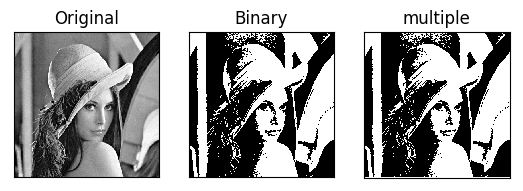

In [30]:
img=cv2.imread("data/lenna.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# THRESH_BINARY: 二值化--The gray value greater than 127 is 255, and the gray value less than 127 is 0
# ret is the threshold value and th5 is the image after cv2.THRESH_BINARY
ret,th=cv2.threshold(img, 127, 255, cv2.THRESH_BINARY);
img_multiple=cv2.multiply(img,th)
images=[img,th,img_multiple]
title=["Original","Binary","multiple"]
for i in range(3):
    plt.subplot(1, 3, i + 1)
    plt.imshow(images[i], 'gray')
    plt.title(title[i])
    plt.xticks([])
    plt.yticks([])

### Logical operation(AND, NOT, OR)
* mask (https://baike.baidu.com/item/%E6%8E%A9%E8%86%9C/8544392?fr=aladdin) using a binary image to  mask another image
* ```cv2.bitwise_and(img1,img2)```——AND
* ```cv2.bitwise_or(img1,img2)```——OR
* ```cv2.bitwise_not(img)```——NOT
* ```cv2.bitwise_xor(img1,img2)```——exclusive OR(If  a and b are different, the XOR result is 1. If a and b are the same, the XOR result is 0)




In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
img_A=cv2.imread("data/Images/A.jpg")
img_A=cv2.cvtColor(img_A,cv2.COLOR_BGR2GRAY)
img_A=cv2.resize(img_A,(300,300))
# generate a circle
Circle = np.zeros((300,300),dtype="uint8")
cv2.circle(Circle,(150,150),110,255,-1)
# logical operations
bitwise_And = cv2.bitwise_and(img_A,Circle)
bitwise_Or=cv2.bitwise_or(img_A,Circle)
bitwise_Not=cv2.bitwise_not(img_A)
bitwise_Xor=cv2.bitwise_xor(img_A,Circle)

# show the result
images=[img_A,Circle,bitwise_And,bitwise_Or,bitwise_Not,bitwise_Xor]
title=['original1','original2','And','Or','Not','Xor']
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(images[i],cmap="gray")
    plt.title(title[i])
    plt.xticks([])
    plt.yticks([])


error: OpenCV(4.1.1) /io/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'


## 3. Using cameras and loading videos

- `cv2.VideoCapture()`, `cv2.VideoWriter()`,`IPython.display.Video()`

In [32]:
# load video
import IPython
IPython.display.Video("data/demo_video.mp4")

In [34]:
# open camera
# while you can use this function in pycharm, because AIStudio on line CAN'T open camera!!!
import cv2
capture = cv2.VideoCapture(0)

while(True):
    # get one fram
    ret, frame = capture.read()
    # color to gray
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    cv2.imshow('frame', gray)
    if cv2.waitKey(1) == ord('q'):
        break

VIDEOIO ERROR: V4L: can't open camera by index 1


error: OpenCV(4.1.1) /io/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'
